In [2]:
import graphviz as gvz

# Bipertite Graph Judgement  
頂点数$n$のNon-Directed Graphが与えられる．隣接している頂点同士が違う色になるように，頂点に色を塗る．２章以内で全ての頂点を塗ることができるか判定して下さい．多重辺やループはないものとする．

### Restriction  
- $1 \leq n \leq 1000$

---
## example1
### input
- $n = 3$
- $e(0, 1) = e(1, 0)$
- $e(0, 2) = e(2, 0)$
- $e(1, 2) = e(2, 1)$

### answer  
- No：色を塗るのには３色必要


In [25]:
ex1 = gvz.Graph(format='png')
ex1.attr('node', shape = 'circle')

# node
ex1.node("0")
ex1.node("1")
ex1.node("2")

# edge
ex1.edge("0", "1")
ex1.edge("0", "2")
ex1.edge("1", "2")

# show
ex1.render('ex1')

'ex1.png'

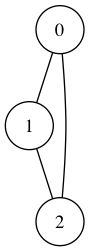

In [28]:
from IPython.display import Image, display_png
display_png(Image('ex1.png'))

---
## example2
### input  
- $n =4$
- $e(0, 1) = e(1, 0)$
- $e(0, 3) = e(3, 0)$
- $e(1, 2) = e(2, 1)$
- $e(2, 3) = e(3, 2)$

### answer  
- Yes

In [121]:
ex2 = gvz.Graph(format='png')
ex2.attr('node', shape = 'circle')

# node
ex2.node("0")
ex2.node("1")
ex2.node("2")
ex2.node("3")

# edge
ex2.edge("0", "1")
ex2.edge("0", "3")
ex2.edge("1", "2")
ex2.edge("2", "3")

# show
ex2.render('ex2')

'ex2.png'

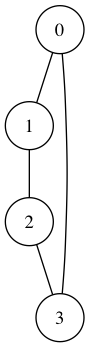

In [122]:
from IPython.display import Image, display_png
display_png(Image('ex2.png'))

---
### 解答の方針  
2色で塗り分けていくので，適当な頂点を一つ選び色を決めれば隣接する頂点の色も決まる．これを続けていけば判定ができる．深さ優先探索で簡単に書ける．

### グラフを扱うクラス  

In [88]:
class Graph():
    def __init__(self):
        self.vertex_list = []
        self.edge_dict = {}
  
    def vertex_exist(self, v):
        return v in self.vertex_list
    
    def edge_exist(self, v1, v2):
        if not self.vertex_exist(v1) or not self.vertex_exist(v2):
            return "vertex exist error"
        else:
            return v1 in self.edge_dict[v2] and v2 in self.edge_dict[v1]

    def add_vertex(self, v):
        if not self.vertex_exist(v):
            self.vertex_list.append(v)
            self.edge_dict[v] = []
        else:
            return 'node exists error'
            
    def add_edge(self, v1, v2):
        if not self.edge_exist(v1, v2):
            self.edge_dict[v1].append(v2)
            self.edge_dict[v2].append(v1)
        else:
            return  'edge exists error'

            
    def rm_vertex(self, v):
        if self.vertex_exist(v):
            self.vertex_list.pop(self.vertex_list.index(v))
            self.edge_dict[v].pop()            
        else:
            return  'edge exists error'
            
            
    def rm_edge(self, v1, v2):
        if self.edge_exist(v1, v2):
            self.edge_dict[v1].append(v2)
            self.edge_dict[v2].append(v1)
        else:
            return 'edge exists error'
        

    def adj_vertex(self, v):
        if self.vertex_exist(v):
            return self.edge_dict[v]
        else:
            return 'vertex exists error'
            
            
    def degree(self, v):
        if self.vertex_exist(v):
            return len(self.edge_dict[v])
        else:
            return 'vertex exists error'
        
        
    def show(self):
        print(self.vertex_list)
        print(self.edge_dict)

In [89]:
g = Graph()

In [90]:
# node
g.add_vertex(0)
g.add_vertex(1)
g.add_vertex(2)

In [91]:
# edge
g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(2, 0)

# show
g.show()

[0, 1, 2]
{0: [1, 2], 1: [0, 2], 2: [1, 0]}


In [92]:
g.adj_vertex(0)

[1, 2]

In [93]:
g.edge_exist(0, 1)

True

In [94]:
g.edge_exist(1,2)

True

---

In [112]:
# input  ex1
V = 3 # 頂点数
color = [0]*V # 頂点の色
edges = [[0,1], [0, 2], [1, 2]] # 隣接リスト

In [113]:
g = Graph()

for i in [0,1,2]:
    g.add_vertex(i)

In [114]:
for i, j in edges:
    g.add_edge(i, j)

In [115]:
g.show()

[0, 1, 2]
{0: [1, 2], 1: [0, 2], 2: [0, 1]}


In [116]:
def dfs(g, v, c):
    color[v] = c # coloring vertex v by c
    for vi in g.adj_vertex(v):
        # 隣接している頂点が同じ色なら false
        if color[vi] == c:
            return False
        elif color[vi] == 0 and not dfs(g, vi, -c):
            return False
    return True

In [117]:
res = "Yes"

for i in g.vertex_list:
    if color[i] == 0:
        #  まだ頂点iが塗られていなければ1で塗る
        if not dfs(g, i, 1):
                res = "No"

print(res)

No


---

In [118]:
V = 4
color = [0]*V
edges = [[0, 1], [0, 3], [1, 2], [2, 3]]
g = Graph()

In [119]:
for v in [0, 1, 2, 3]:
    g.add_vertex(v)

for i, j in edges:
    g.add_edge(i, j)

In [120]:
res = 'Yes'

for i in g.vertex_list:
    if color[i] == 0:
        if not dfs(g, i, 1):
            res = 'No'

print(res)

Yes
